In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.nn import MSELoss

from laser_jitter.data import TimeSeries

In [8]:
N = 5
smooth_params = {
    'kernel': np.ones(N)/N,
}

data = pd.read_csv("/home/wi73yus/focus_deviation/data/cryo07_decFULL.csv", header=None)
data = data.rename({0: 'real_time', 1:'focus_location'}, axis=1)
data['time_idx'] = np.arange(len(data['real_time']))

ts_data = np.array(data['focus_location'])

ts = TimeSeries(ts_data[:10000], smooth_params=smooth_params, train_size=0.8)
results = ts.smooth_split_and_scale()

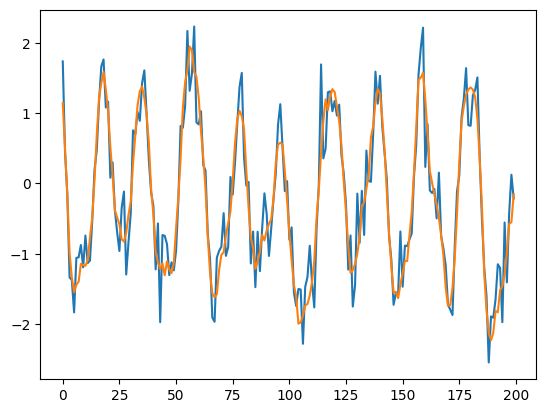

In [9]:
idx = 200
plt.figure()
plt.plot(ts.test[:idx])
plt.plot(ts.test_smooth[:idx])
plt.show()

In [15]:
sequence_params = {
    'training_window': 200,
    'prediction_window': 100,
    'step': 1
}

dataloader_params = {
    'batch_size': 64,
    'shuffle': False,
    'drop_last': False
}
loaders = ts.create_dataloaders(ts.train, ts.test, sequence_params, dataloader_params)
trainloader, testloader = loaders
loaders_smooth = ts.create_dataloaders(ts.train_smooth, ts.test_smooth, sequence_params, dataloader_params)
trainloader_smooth, testloader_smooth = loaders_smooth

In [16]:
for (x, y), (x_smooth, y_smooth) in zip(trainloader, trainloader_smooth):
    print(x.shape, y.shape)
    print(x_smooth.shape, y_smooth.shape)
    break

torch.Size([64, 200, 1]) torch.Size([64, 100, 1])
torch.Size([64, 200, 1]) torch.Size([64, 100, 1])
